In [5]:
import tensorflow as tf
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense , Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import History
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#  whenever we are using the sequential class of keras for our NN model, There is no need of creating a separate input layer.

In [7]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

In [8]:
mean = x_train.mean(axis=0)
std = x_train.std(axis=0)
x_train = (x_train - mean) / std
x_test = (x_test - mean) / std

In [9]:
x_train.shape[1]

13

In [11]:
def build_model(dropout_rate):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
        Dropout(dropout_rate),
        Dense(32, activation='relu'),
        Dropout(dropout_rate),
        Dense(1)  # output layer for regression
    ])
    model.compile(optimizer=Adam(), loss='mean_squared_error')
    return model

In [12]:
dropout_rate = [0.2,0.5,0.9]
history_dict = {}

In [13]:
# Train models with different dropout rates
for rate in dropout_rate:
    print(f"Training model with dropout rate: {rate}")
    model = build_model(rate)
    history = History()
    history_dict[rate] = history
    model.fit(x_train, y_train, epochs=50, validation_split=0.2, verbose=0 ,callbacks=[history])

Training model with dropout rate: 0.2


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training model with dropout rate: 0.5
Training model with dropout rate: 0.9


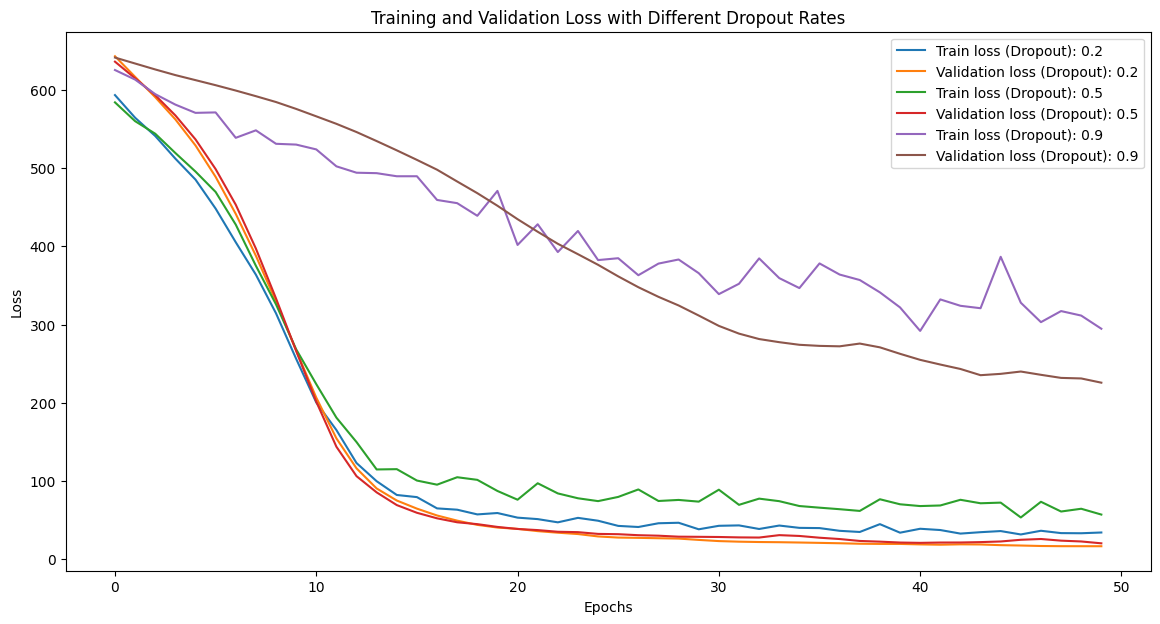

In [15]:
# plot training and validation loss
plt.figure(figsize=(14, 7))

for rate, history in history_dict.items():
    plt.plot(history.history['loss'], label=f'Train loss (Dropout): {rate}')
    plt.plot(history.history['val_loss'], label=f'Validation loss (Dropout): {rate}')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss with Different Dropout Rates')
plt.legend()